# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
number= 0

name=[]
lat=[]
lon=[]
temp=[]
max_temp=[]
wind_spd=[]
clouds=[]
humidity=[]

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" + city

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    number=number+1

    try:
        print(f"{number}: {weather_json['name']}")
        name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_spd.append(weather_json['wind']['speed'])
        clouds.append(weather_json['clouds']['all'])
        humidity.append(weather_json['main']['humidity'])
    except:
        print("Missing name data")
        name.append("Missing data")
        lat.append("Missing data")
        lon.append("Missing data")
        temp.append("Missing data")
        max_temp.append("Missing data")
        wind_spd.append("Missing data")
        clouds.append("Missing data")
        humidity.append("Missing data")

1: Ketchikan
2: Cape Town
Missing name data
4: Makkah al Mukarramah
5: Port Alfred
6: Souillac
7: Hithadhoo
8: Busselton
9: Sambava
Missing name data
11: Yarmouth
12: Hobart
13: New Norfolk
14: Filingué
15: Örnsköldsvik
16: Hasaki
17: Punta Arenas
18: Mataura
19: Yellowknife
20: Saskylakh
21: Lüderitz
Missing name data
Missing name data
24: Barrow
25: Kaitangata
26: Jamestown
27: Flinders
28: Fort Nelson
Missing name data
30: Adrar
31: Ushuaia
32: Bengkulu
33: Vostok
34: Hermanus
35: Kendari
36: Rikitea
37: Nikolskoye
38: Carnarvon
39: Bahía de Caráquez
40: Cape Canaveral
41: Gillette
42: Cherskiy
43: Puerto Ayora
44: Mar del Plata
45: Khovd
Missing name data
47: Mehamn
48: Thompson
49: Saint-Philippe
50: Raahe
Missing name data
52: Qaanaaq
53: Esperance
54: Belmonte
55: Cayenne
56: Bad Liebenzell
57: Bredasdorp
Missing name data
59: Lata
60: Ilulissat
61: Vaini
62: Suba
63: Manta
Missing name data
65: Severo-Kuril'sk
66: Spirovo
Missing name data
68: Manyana
69: Atuona
70: Lorengau
71

556: Babu
557: Sur
558: Mazagão
559: Brodnica
560: Norman Wells
561: Faya
562: Chumikan
563: Atoyac
564: Hongjiang
565: College
566: Puksoozero
567: Wellin
568: Dargaville
569: Turukhansk
570: Turbat
571: Hue
572: Aurdal
Missing name data
574: Roebourne
575: Savelugu
576: Mankāpur
577: Henderson
578: Kasongo-Lunda
Missing name data
580: Dalvik
581: Bathsheba
582: Barão de Melgaço
583: Puerto Escondido
584: Lethem
585: Daru
586: Mt. Pleasant
587: Arman'
588: Mehrān
589: Wau
590: Boralday
591: Paraná
592: Palmer
593: Pisco
594: Vila Franca do Campo
595: Maddagiri
596: Katobu
597: Lebyazh'ye
598: Partenit
599: Tocopilla
600: Beloha
601: Bandarbeyla
602: Aykhal


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = {
    'city': name,
    'latitude':lat,
    'longitude':lon,
    'temperature':temp,
    'max temperature':max_temp,
    'wind speed':wind_spd,
    'cloudiness':clouds,
    'humidity':humidity
}

original_city_df = pd.DataFrame(city_data)
original_city_df.head()

,city,latitude,longitude,temperature,max temperature,wind speed,cloudiness,humidity
0,Ketchikan,55.3422,-131.646,50.47,50.47,19.57,90,87
1,Cape Town,-33.9258,18.4232,59.31,61.27,3,75,82
2,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data
3,Makkah al Mukarramah,21.4267,39.8261,85.06,85.06,4.54,6,46
4,Port Alfred,-33.5906,26.891,61.41,61.41,2.39,29,85


In [6]:
city_df = original_city_df.loc[original_city_df['latitude'] != 'Missing data']
city_df.count()

city               544
latitude           544
longitude          544
temperature        544
max temperature    544
wind speed         544
cloudiness         544
humidity           544
dtype: int64

In [7]:
city_df.to_csv('output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humid = city_df.loc[city_df['humidity'] > 100]
humid.count()

city               0
latitude           0
longitude          0
temperature        0
max temperature    0
wind speed         0
cloudiness         0
humidity           0
dtype: int64

In [9]:
#  Get the indices of cities that have humidity over 100%.



In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
city_lat = city_df['latitude']
city_temp = city_df['temperature']
city_humidity = city_df['humidity']
city_cloud = city_df['cloudiness']
city_wind =city_df['wind speed']

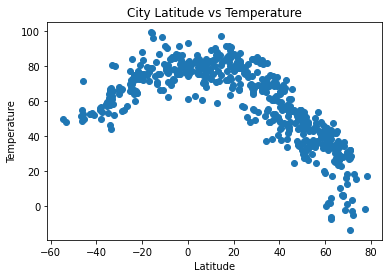

In [12]:
plt.scatter(city_lat,city_temp)

plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")

plt.savefig("lat-temp.png")
plt.show()

As you would expect, the cities closer to the equator have higher temperatures. It is interesting that those closer to the North Pole have lower temperatures than those closer to the South Pole. That could be due to fewer cities selected in the Southern Hemisphere, though.

## Latitude vs. Humidity Plot

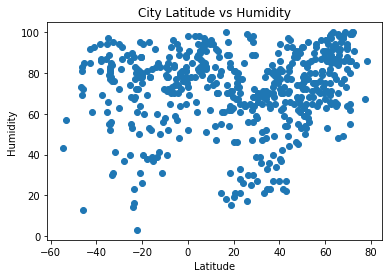

In [13]:
plt.scatter(city_lat,city_humidity)

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("lat-hum.png")
plt.show()

There doesn't seem to be much correlation between humidity and latitude. This isn't too surprising as there are rain-heavy/very-humid regions all over the globe, just like there are deserts scattered around. 

## Latitude vs. Cloudiness Plot

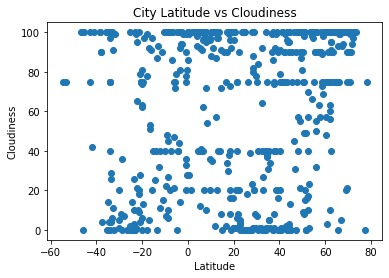

In [14]:
plt.scatter(city_lat,city_cloud)

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig("lat-cloud.png")
plt.show()

Much like humidity, there isn't much correlation between cloudiness and latitude. I am curious about the straight lines of points that appeared. My guess would be something in how the cloudiness is calculated that results in the multiple cities having the same exact measurement.

## Latitude vs. Wind Speed Plot

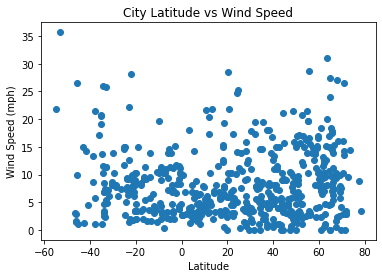

In [15]:
plt.scatter(city_lat,city_wind)

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("lat-wind.png")
plt.show()

Not much correlation between the two factors here, either, though it does show that most of the cities selected tend to not have very high wind-speeds.

## Linear Regression

In [21]:
#Ran into error that regression model couldn't use the type the fields were set to, need to change to float

city_df['latitude']=city_df['latitude'].astype(float)
city_df['longitude']=city_df['longitude'].astype(float)
city_df['temperature']=city_df['temperature'].astype(float)
city_df['max temperature']=city_df['max temperature'].astype(float)
city_df['wind speed']=city_df['wind speed'].astype(float)
city_df['cloudiness']=city_df['cloudiness'].astype(float)
city_df['humidity']=city_df['humidity'].astype(float)

city_df.dtypes



<ipython-input-21-9e2c01d31959>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['latitude']=city_df['latitude'].astype(float)
<ipython-input-21-9e2c01d31959>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['longitude']=city_df['longitude'].astype(float)
<ipython-input-21-9e2c01d31959>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

city                object
latitude           float64
longitude          float64
temperature        float64
max temperature    float64
wind speed         float64
cloudiness         float64
humidity           float64
dtype: object

In [22]:
north = city_df.loc[city_df['latitude'] >= 0]
south = city_df.loc[city_df['latitude'] < 0]

north_lat = north['latitude']
north_temp = north['max temperature']
north_hum = north['humidity']
north_wind = north['wind speed']
north_cloud =north['cloudiness']

south_lat = south['latitude']
south_temp = south['max temperature']
south_hum = south['humidity']
south_wind = south['wind speed']
south_cloud =south['cloudiness']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.730281617054467


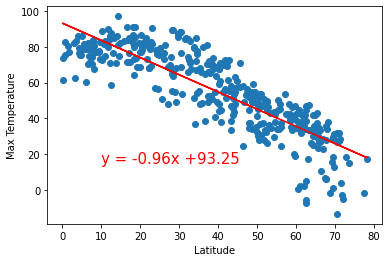

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../north_temp-lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6005427895167982


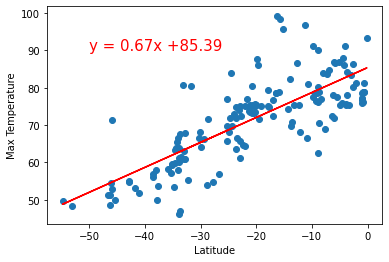

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../south_temp-lat.png")
plt.show()

The regression here is showing a high correlation between latitude and temperature, namely that the closer to the equator that you get, the higher the temperature. The correlation is, oddly, stronger in the northern hemisphere than the southern (0.73 vs 0.6 r-value).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02764964267165101


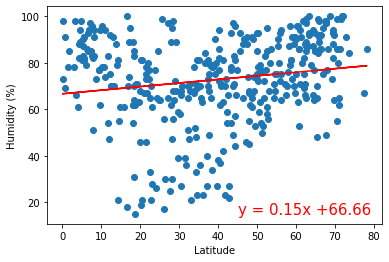

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_hum)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../north_lat-hum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0017101011580508499


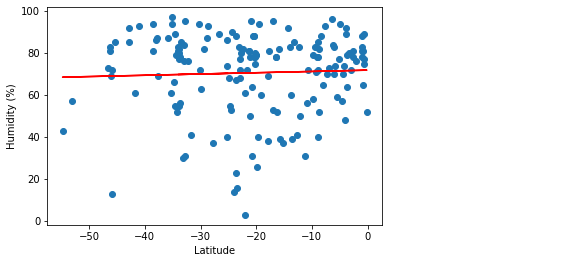

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_hum)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../south_hum-lat.png")
plt.show()

The regression model for humidity shows that there is essentially no correlation between humidity and latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04302591541263046


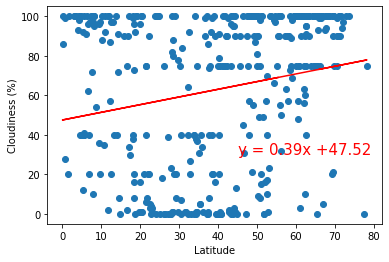

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../north_lat-cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 1.4496907371856694e-05


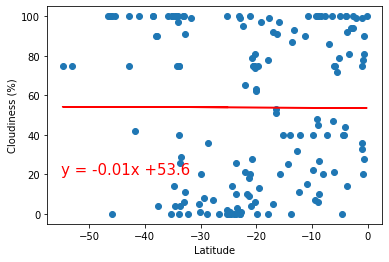

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../south_lat-cloud.png")
plt.show()

There is minimal correlation between latitude and cloudiness. There does appear to be something wrong with the regression model for the southern hemisphere, though, as it's r-value is greater than 1. Based on what I was able to find when researching why this would happen, the general consensus was that the sample size was too small. This does track with the other odd patterns observed in the southern hemisphere data. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0433837696976923


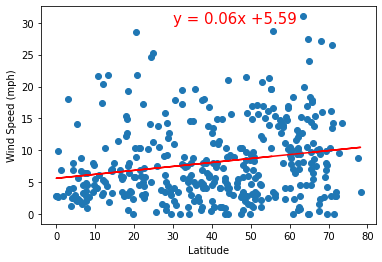

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../north_lat-wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04540321722658006


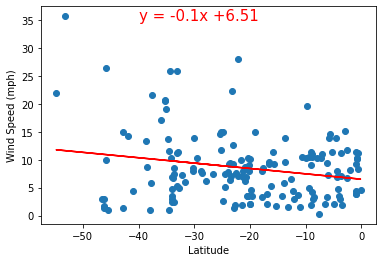

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../south_lat-wind.png")
plt.show()

The correlation between wind speed and latitude is very similar for both the northern and southern hemispheres (r-value is appx. 0.04). Unfortunately, there is still no strong correlation between these two factors. 